# Der Gradient

In [1]:
%matplotlib inline
import numpy as np
from forschungspraktikum.jiles_atherton.functions import jiles_atherton_H
from scipy.constants import mu_0
from scipy import signal
import matplotlib.pyplot as plt


In [92]:
# Beispielparameter des Jiles-Atherton-Modells
alpha = 0.0003
a = 40.25
Msat = 350000
k = 80.0
c = 0.7


# Eingangsgrößen
r = 2.0e-2 # m, Radius
i_hat = 1.2 # A, Strom
f = 1.0 # Hz, Frequenz
n = 3 # Anzahl Perioden
n_p = 512# Datenpunkte pro Periode

t = np.arange(n * n_p)/(n_p*f) # Zeitvektor
current = -i_hat*signal.sawtooth(2*np.pi*f*t + np.pi/2, 0.5)#np.sin(2*np.pi*f*t) # Stromvorgabe
H = 8*current/(2*np.pi*r)#*np.exp(-2*np.pi*f*t/10) # Resultierende Feldvorgabe

In [93]:
# Eingabedaten Tiefpassfiltern (Numerische Stabilität)
f_b, f_a = signal.bessel(6, 0.05, 'low')
H = signal.lfilter(f_b, f_a, H)

print(np.max(H))

71.98730309483338


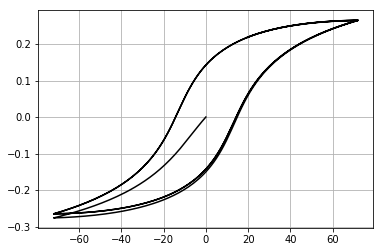

In [94]:
M = jiles_atherton_H(H, t, [alpha, a, Msat, k, c])
B = mu_0*(H[::2]+M)
plt.plot(H[::2], B, color='xkcd:black')
plt.grid()
plt.show()

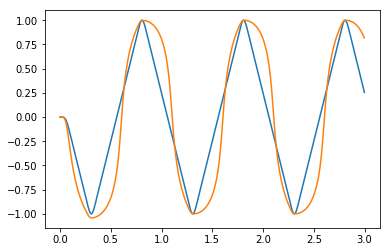

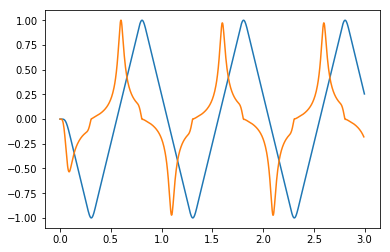

In [95]:
u_ = np.diff(B)[::]
x = u_*H[:-2:2]

plt.plot(t, H/np.max(H))
#np.savetxt("current_h.txt", np.array([t, H/np.max(H)]).T)
plt.plot(t[::2], B/np.max(B))
#np.savetxt("current_b.txt", np.array([t[::2], B/np.max(B)]).T)
plt.show()

plt.plot(t, H/np.max(H))
#np.savetxt("current_p.txt", np.array([t[:-2:2], x/np.max(x)]).T)
plt.plot(t[:-2:2], u_/np.max(u_))
#np.savetxt("current_u.txt", np.array([t[:-2:2], u_/np.max(u_)]).T)

In [96]:
plt.show()